In [ ]:
import pandas as pd

# Load the CSV file to examine its structure and identify any required cleanup
survey_data = pd.read_csv('/content/Copy of Wireless  Speakers Survey Form Responses.csv')

# Display the first few rows of the dataset to understand its structure
survey_data.head()

,Timestamp,Email Address,Do you own a wireless speaker?,How often do you use your wireless speaker?,How would you rate the sound quality of your wireless speaker?,Please tell us a bit more about your rating of the sound quality of your wireless speaker.,What's most important to you in a wireless speaker? [Sound quality],What's most important to you in a wireless speaker? [Battery life],What's most important to you in a wireless speaker? [Design/Looks],"What's most important to you in a wireless speaker? [Connectivity options (e.g., Bluetooth, Wi-Fi)]",...,Have any other lifestyle changes in the past year changed how you use wireless speakers? (Select all that apply),How much did you spend on your wireless speaker? (US dollars),How likely are you to buy a new wireless speaker in the next 12 months?,Where do you like to buy wireless speakers?,How do you think about and evaluate the price when buying a wireless speaker?,How old are you?,What is your gender?,What's your annual household income?,"Thanks a bunch for completing our survey! Your feedback is super valuable and will help us understand what consumers want. \n\nIf you have any extra comments or feedback, please share them below.",Score
0,7/15/2024 0:17,fedenakashima@gmail.com,Yes,Daily,Excellent,I think it is excellent because I have nothing...,1.0,3.0,4.0,5.0,...,"More media consumption (music, movies, games)",Less than $50,1.0,"Large multi-brand stores (e.g., Amazon)",I compare it to weather it is a better option ...,18-24,Female,"More than $100,000",-,NaN
1,7/15/2024 0:21,victor3flores@yahoo.com,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/15/2024 0:38,joycipaluz@gmail.com,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7/15/2024 21:59,kandacelipscomb4@gmail.com,Yes,Once a week,Good,"It's kinda staticky, but it gets the job done (:",4.0,1.0,3.0,5.0,...,"Spending more time at home, Home workouts",$50 to $100,3.0,"Large multi-brand stores (e.g., Amazon)",I tend to go cheaper,18-24,Female,"$25,000-$50,000",NaN,NaN
4,7/15/2024 21:59,lailaball1@icloud.com,Yes,Daily,Excellent,It's a Bose and It's the best,6.0,4.0,2.0,5.0,...,"More media consumption (music, movies, games)",$100 to $200,2.0,"Large multi-brand stores (e.g., Amazon)",Usage,18-24,Female,"$50,000-$75,000",Na,NaN


In [ ]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Data columns (total 33 columns):
 #   Column                                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                                             --------------  -----  
 0   Timestamp                                                                                                                                                                                          4465 non-null   object 
 1   Email Address                                                                                                                                                                                      4465 non-null   objec

In [ ]:
# Focus on the relevant column for usage frequency analysis
usage_column = "How often do you use your wireless speaker?"

# Extract the usage data for analysis and drop any missing values
usage_data = survey_data[usage_column].dropna()

# Calculate the distribution of usage frequency
usage_distribution = usage_data.value_counts(normalize=True) * 100  # Convert to percentages
usage_distribution_sorted = usage_distribution.sort_index()  # Sort by logical order of categories

# Display the distribution
usage_distribution_sorted


# export to JSON
#usage_distribution_sorted.to_json('usage_distribution_sorted.json')

,proportion
How often do you use your wireless speaker?,
1-3 times a month,13.570070
Daily,29.518072
Once a week,10.716550
Rarely (fewer than once a month),11.826252
Several times a week,34.369055


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numerical columns for descriptive statistics
numerical_columns = survey_data.select_dtypes(include=['float64', 'int64'])

# Calculate basic descriptive statistics
descriptive_stats = numerical_columns.describe().T
descriptive_stats['mode'] = numerical_columns.mode().iloc[0]  # Add mode to statistics

In [ ]:
#descriptive_stats.to_json('descriptive_stats.json')

In [ ]:
numerical_columns.columns

Index(['What's most important to you in a wireless speaker? [Sound quality]',
       'What's most important to you in a wireless speaker? [Battery life]',
       'What's most important to you in a wireless speaker? [Design/Looks]',
       'What's most important to you in a wireless speaker? [Connectivity options (e.g., Bluetooth, Wi-Fi)]',
       'What's most important to you in a wireless speaker? [Durability]',
       'What's most important to you in a wireless speaker? [Price]',
       'How happy are you with your wireless speaker?',
       'How likely are you to buy a new wireless speaker in the next 12 months?'],
      dtype='object')

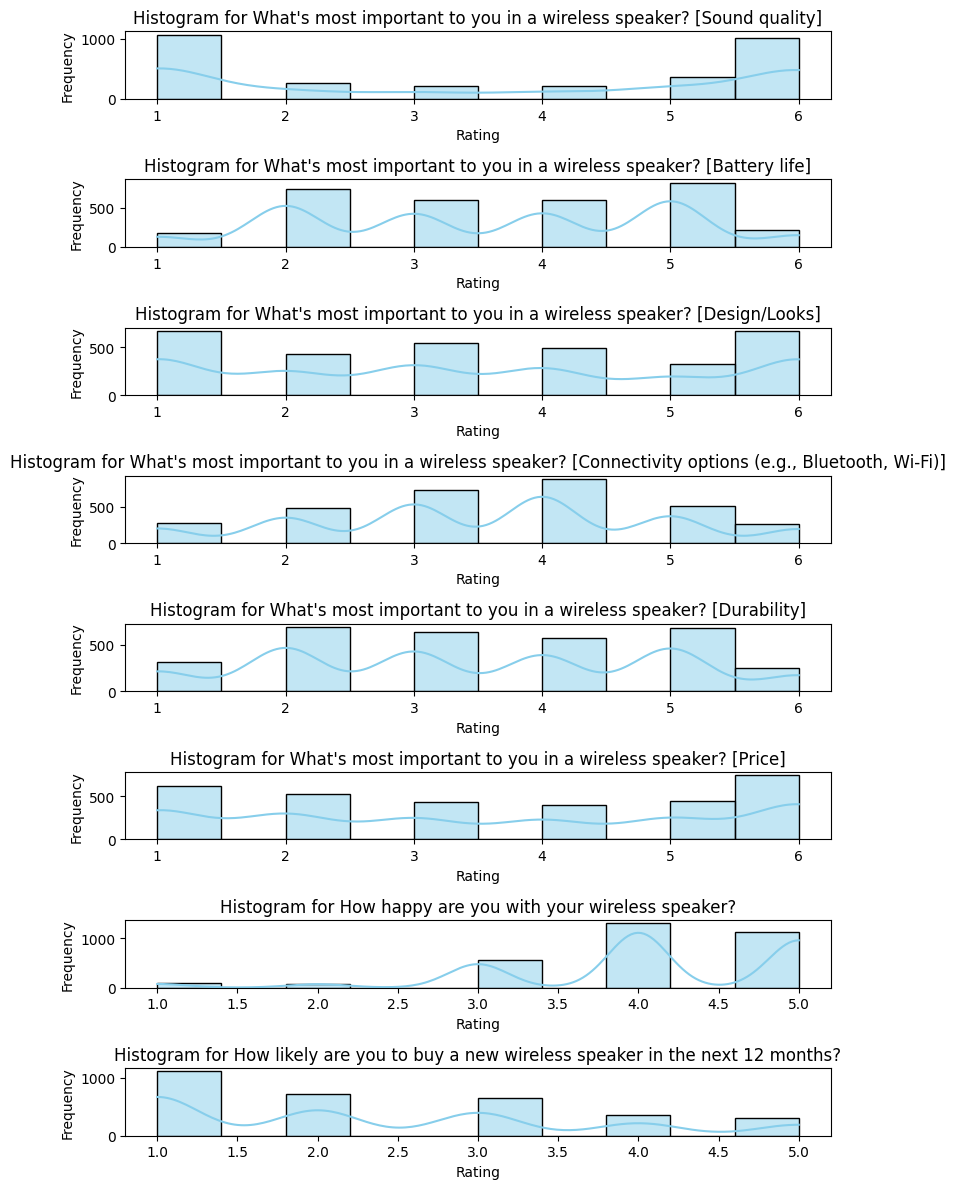

In [ ]:
# Create histograms for selected columns
fig, axes = plt.subplots(len(numerical_columns.columns), 1, figsize=(8, 12))
for idx, col in enumerate(numerical_columns.columns):
    if col in numerical_columns.columns:
        sns.histplot(numerical_columns[col].dropna(), kde=True, ax=axes[idx], bins=10, color='skyblue')
        axes[idx].set_title(f"Histogram for {col}")
        axes[idx].set_xlabel("Rating")
        axes[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

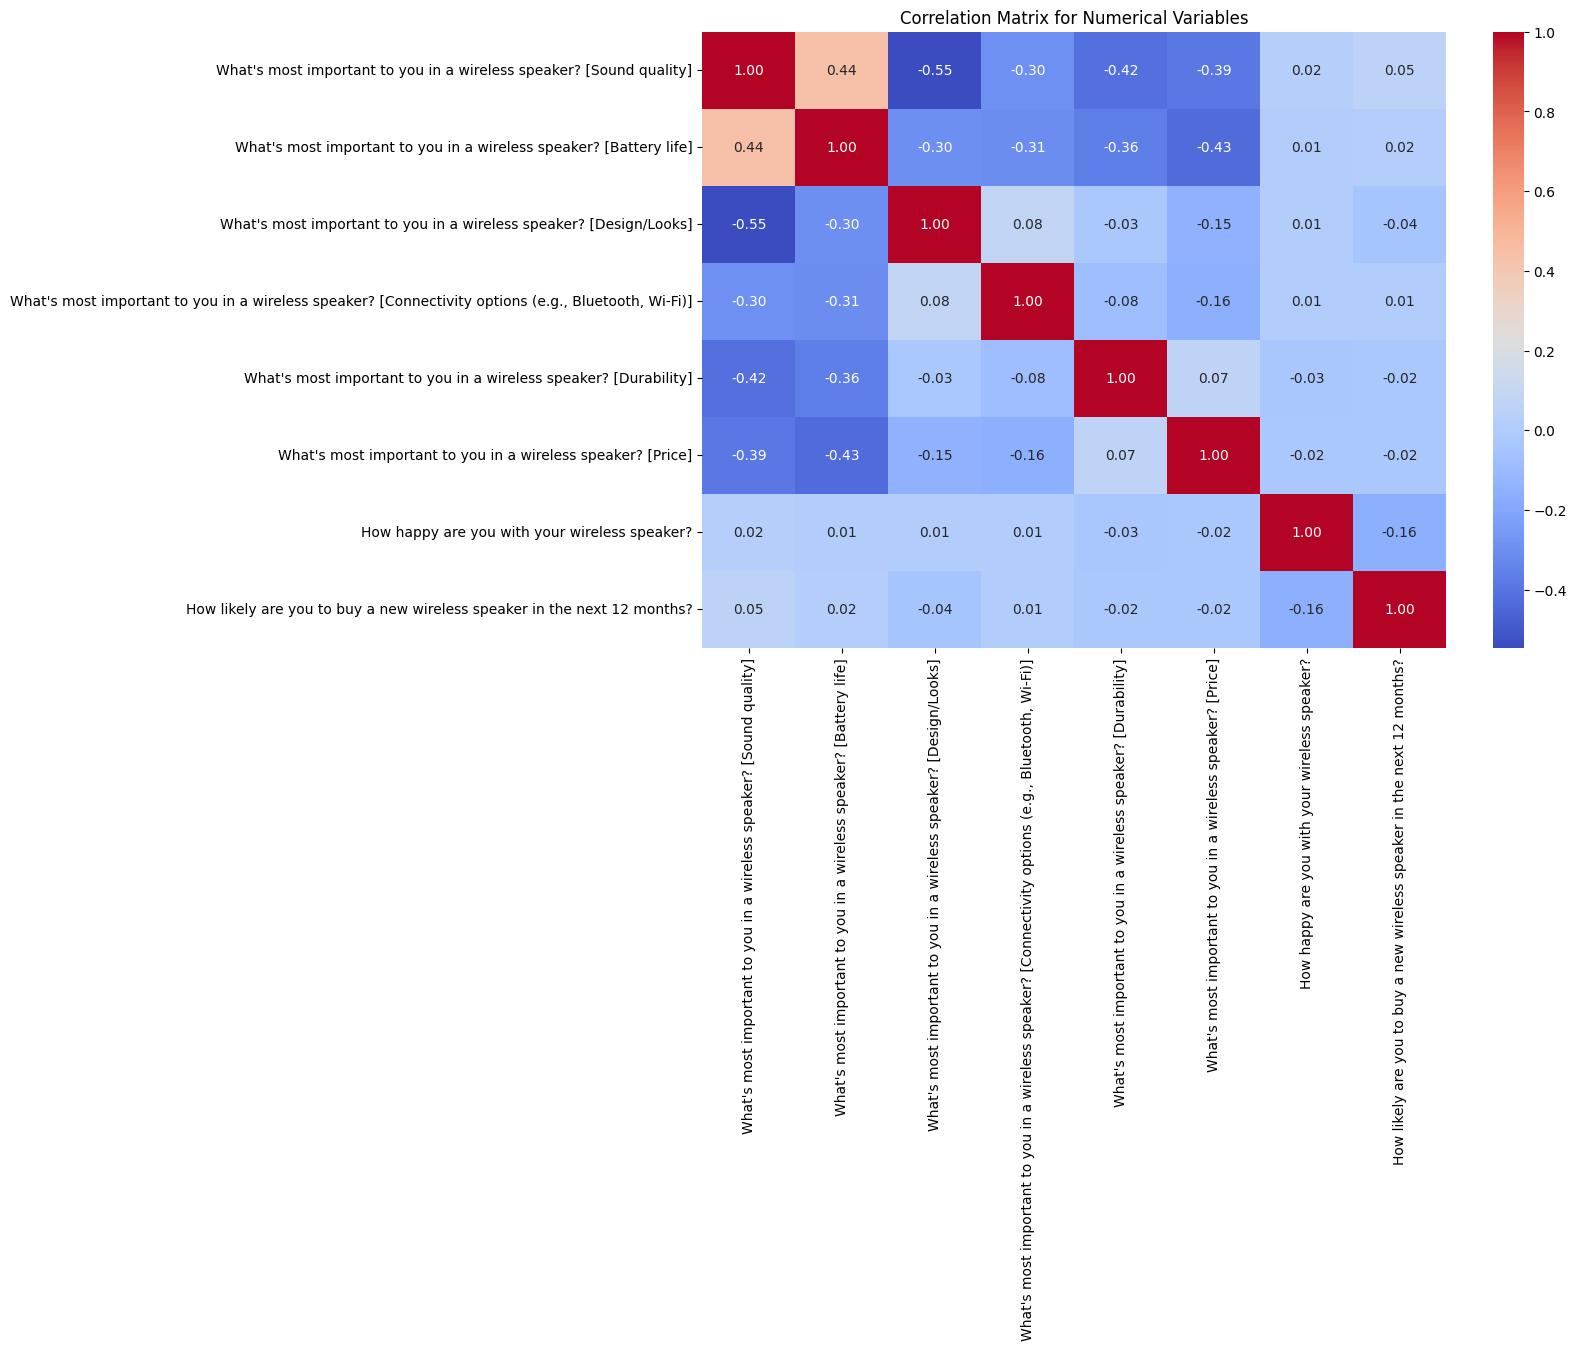

In [ ]:
# Calculate correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

In [ ]:
correlation_matrix

,What's most important to you in a wireless speaker? [Sound quality],What's most important to you in a wireless speaker? [Battery life],What's most important to you in a wireless speaker? [Design/Looks],"What's most important to you in a wireless speaker? [Connectivity options (e.g., Bluetooth, Wi-Fi)]",What's most important to you in a wireless speaker? [Durability],What's most important to you in a wireless speaker? [Price],How happy are you with your wireless speaker?,How likely are you to buy a new wireless speaker in the next 12 months?
What's most important to you in a wireless speaker? [Sound quality],1.000000,0.444456,-0.545795,-0.296036,-0.418869,-0.385463,0.024854,0.053167
What's most important to you in a wireless speaker? [Battery life],0.444456,1.000000,-0.300116,-0.309498,-0.364024,-0.434282,0.010354,0.018881
What's most important to you in a wireless speaker? [Design/Looks],-0.545795,-0.300116,1.000000,0.077289,-0.025150,-0.149695,0.009880,-0.044807
"What's most important to you in a wireless speaker? [Connectivity options (e.g., Bluetooth, Wi-Fi)]",-0.296036,-0.309498,0.077289,1.000000,-0.084771,-0.156963,0.009609,0.009677
What's most important to you in a wireless speaker? [Durability],-0.418869,-0.364024,-0.025150,-0.084771,1.000000,0.068454,-0.028768,-0.023738
What's most important to you in a wireless speaker? [Price],-0.385463,-0.434282,-0.149695,-0.156963,0.068454,1.000000,-0.020747,-0.021250
How happy are you with your wireless speaker?,0.024854,0.010354,0.009880,0.009609,-0.028768,-0.020747,1.000000,-0.159276
How likely are you to buy a new wireless speaker in the next 12 months?,0.053167,0.018881,-0.044807,0.009677,-0.023738,-0.021250,-0.159276,1.000000


In [ ]:
# Display descriptive statistics
descriptive_stats

,count,mean,std,min,25%,50%,75%,max,mode
What's most important to you in a wireless speaker? [Sound quality],3154.0,3.497464,2.147767,1.0,1.0,4.0,6.0,6.0,1.0
What's most important to you in a wireless speaker? [Battery life],3154.0,3.563729,1.408561,1.0,2.0,4.0,5.0,6.0,5.0
What's most important to you in a wireless speaker? [Design/Looks],3154.0,3.441978,1.814755,1.0,2.0,3.0,5.0,6.0,6.0
"What's most important to you in a wireless speaker? [Connectivity options (e.g., Bluetooth, Wi-Fi)]",3154.0,3.527901,1.386360,1.0,3.0,4.0,4.0,6.0,4.0
What's most important to you in a wireless speaker? [Durability],3154.0,3.438174,1.485787,1.0,2.0,3.0,5.0,6.0,2.0
What's most important to you in a wireless speaker? [Price],3154.0,3.555168,1.851522,1.0,2.0,4.0,5.0,6.0,6.0
How happy are you with your wireless speaker?,3154.0,4.046607,0.938000,1.0,4.0,4.0,5.0,5.0,4.0
How likely are you to buy a new wireless speaker in the next 12 months?,3154.0,2.379518,1.326344,1.0,1.0,2.0,3.0,5.0,1.0


In [ ]:
import plotly.express as px

# Create an interactive bar chart for usage frequency distribution
usage_chart = px.bar(
    usage_distribution_sorted.reset_index(),
    x=usage_distribution_sorted.index,
    y="How often do you use your wireless speaker?",
    labels={"index": "Usage Frequency", "How often do you use your wireless speaker?": "Percentage (%)"},
    title="Distribution of Wireless Speaker Usage Frequency",
    text="How often do you use your wireless speaker?"
)

# Add a caption in the chart using annotations
usage_chart.update_layout(
    annotations=[
        dict(
            x=0.5,
            y=-0.15,
            xref="paper",
            yref="paper",
            text="Most respondents use their wireless speakers several times a week, with daily usage being the second most common pattern.",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Show the interactive chart
usage_chart.show()


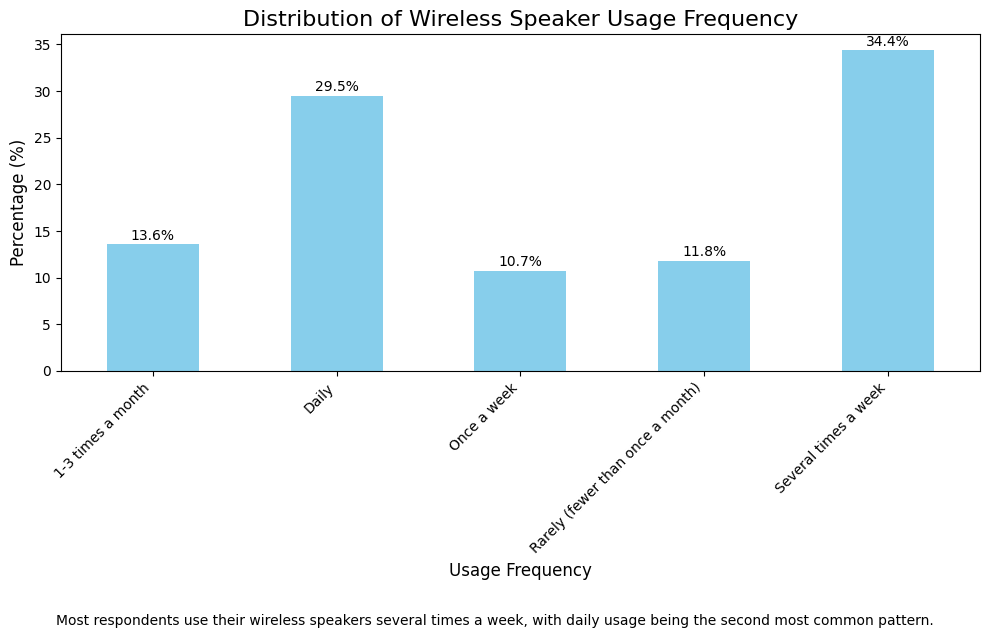

In [ ]:
# Create a static bar chart for usage frequency distribution with labels and a caption
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
usage_distribution_sorted.plot(kind='bar', color='skyblue', ax=ax)

# Add titles and labels
ax.set_title("Distribution of Wireless Speaker Usage Frequency", fontsize=16)
ax.set_xlabel("Usage Frequency", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)
ax.set_xticklabels(usage_distribution_sorted.index, rotation=45, ha="right")

# Add values on top of bars
for i, v in enumerate(usage_distribution_sorted):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10)

# Caption
caption = "Most respondents use their wireless speakers several times a week, with daily usage being the second most common pattern."
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=10)

# Show the chart
plt.tight_layout()
plt.show()

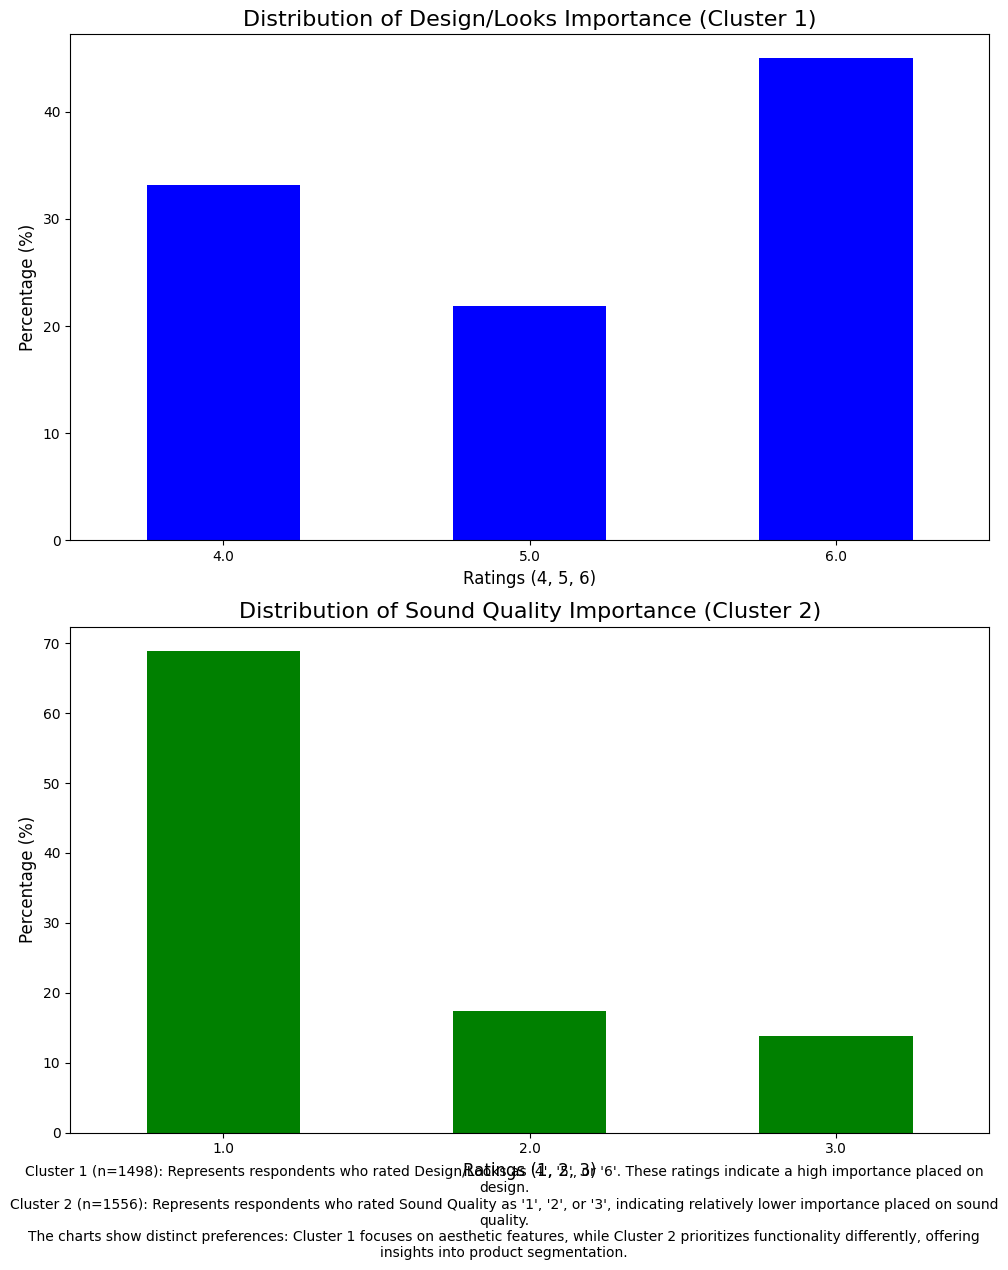

In [ ]:
# Segmentation: Clusters based on Design/Looks and Sound Quality ratings
design_column = "What's most important to you in a wireless speaker? [Design/Looks]"
sound_quality_column = "What's most important to you in a wireless speaker? [Sound quality]"

# Cluster 1: Rated 4, 5, or 6 on Design/Looks
cluster_1 = survey_data[survey_data[design_column].isin([4, 5, 6])]

# Cluster 2: Rated 1, 2, or 3 on Sound Quality
cluster_2 = survey_data[survey_data[sound_quality_column].isin([1, 2, 3])]

# Sample sizes for both clusters
cluster_1_size = len(cluster_1)
cluster_2_size = len(cluster_2)

# Calculate distributions for Design/Looks and Sound Quality within both clusters
design_distribution_cluster_1 = cluster_1[design_column].value_counts(normalize=True) * 100
sound_quality_distribution_cluster_2 = cluster_2[sound_quality_column].value_counts(normalize=True) * 100

# Sort distributions for better visualization
design_distribution_cluster_1 = design_distribution_cluster_1.sort_index()
sound_quality_distribution_cluster_2 = sound_quality_distribution_cluster_2.sort_index()

# Visualization of distributions
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Chart for Cluster 1
design_distribution_cluster_1.plot(kind='bar', color='blue', ax=axes[0])
axes[0].set_title("Distribution of Design/Looks Importance (Cluster 1)", fontsize=16)
axes[0].set_xlabel("Ratings (4, 5, 6)", fontsize=12)
axes[0].set_ylabel("Percentage (%)", fontsize=12)
axes[0].set_xticklabels(design_distribution_cluster_1.index, rotation=0)

# Chart for Cluster 2
sound_quality_distribution_cluster_2.plot(kind='bar', color='green', ax=axes[1])
axes[1].set_title("Distribution of Sound Quality Importance (Cluster 2)", fontsize=16)
axes[1].set_xlabel("Ratings (1, 2, 3)", fontsize=12)
axes[1].set_ylabel("Percentage (%)", fontsize=12)
axes[1].set_xticklabels(sound_quality_distribution_cluster_2.index, rotation=0)

# Detailed Caption
caption = (
    f"Cluster 1 (n={cluster_1_size}): Represents respondents who rated Design/Looks "
    f"as '4', '5', or '6'. These ratings indicate a high importance placed on design.\n"
    f"Cluster 2 (n={cluster_2_size}): Represents respondents who rated Sound Quality "
    f"as '1', '2', or '3', indicating relatively lower importance placed on sound quality.\n"
    f"The charts show distinct preferences: Cluster 1 focuses on aesthetic features, while "
    f"Cluster 2 prioritizes functionality differently, offering insights into product segmentation."
)
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=10)

# Show the charts
plt.tight_layout()
plt.show()

In [ ]:
cluster_1

,Timestamp,Email Address,Do you own a wireless speaker?,How often do you use your wireless speaker?,How would you rate the sound quality of your wireless speaker?,Please tell us a bit more about your rating of the sound quality of your wireless speaker.,What's most important to you in a wireless speaker? [Sound quality],What's most important to you in a wireless speaker? [Battery life],What's most important to you in a wireless speaker? [Design/Looks],"What's most important to you in a wireless speaker? [Connectivity options (e.g., Bluetooth, Wi-Fi)]",...,Have any other lifestyle changes in the past year changed how you use wireless speakers? (Select all that apply),How much did you spend on your wireless speaker? (US dollars),How likely are you to buy a new wireless speaker in the next 12 months?,Where do you like to buy wireless speakers?,How do you think about and evaluate the price when buying a wireless speaker?,How old are you?,What is your gender?,What's your annual household income?,"Thanks a bunch for completing our survey! Your feedback is super valuable and will help us understand what consumers want. \n\nIf you have any extra comments or feedback, please share them below.",Score
0,7/15/2024 0:17,fedenakashima@gmail.com,Yes,Daily,Excellent,I think it is excellent because I have nothing...,1.0,3.0,4.0,5.0,...,"More media consumption (music, movies, games)",Less than $50,1.0,"Large multi-brand stores (e.g., Amazon)",I compare it to weather it is a better option ...,18-24,Female,"More than $100,000",-,NaN
6,7/15/2024 22:50,lovelacesyrai@gmail.com,Yes,Several times a week,Good,The speaker is good quality and is pretty dura...,1.0,3.0,5.0,4.0,...,"Spending more time at home, More online social...",$50 to $100,4.0,"Large multi-brand stores (e.g., Amazon)",The price should be determined by the size but...,18-24,Female,"$75,000-$100,000",NaN,NaN
16,7/16/2024 21:05,susakesimon@gmail.com,Yes,1-3 times a month,Good,"It is very loud, and i prefer loudness to qual...",6.0,5.0,4.0,3.0,...,"Spending more time at home, Working from home ...",Less than $50,5.0,Department stores (physical store that sells e...,quality of the speaker and how loud the noise is,18-24,Male,"Less than $25,000",none!,NaN
18,7/16/2024 21:10,corji513@gmail.com,Yes,Daily,Excellent,It's excellent,1.0,2.0,4.0,6.0,...,Spending more time at home,Less than $50,2.0,"Large multi-brand stores (e.g., Amazon)",How loud it can be,18-24,Male,"Less than $25,000",No,NaN
19,7/16/2024 21:11,natalialeary2@gmail.com,Yes,Several times a week,Excellent,very loud and crisp,2.0,4.0,5.0,6.0,...,"Spending more time at home, Home workouts",$50 to $100,3.0,Brand websites,is the price worth it,18-24,Female,"$50,000-$75,000",thanks,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4448,7/11/2024 13:11,Seaisle390@outlook.com,Yes,Daily,Excellent,JBL partybox,4.0,3.0,4.0,4.0,...,"Spending more time at home, Throw parties",$200 to $300,2.0,"Large multi-brand stores (e.g., Amazon)",Prime day,18-24,Male,"More than $100,000",Lit,NaN
4452,7/11/2024 14:42,tylerc.soccer@gmail.com,Yes,Once a week,Good,It's pretty solid for the price but it could d...,3.0,2.0,6.0,4.0,...,"Spending more time at home, Going to the beach",$50 to $100,3.0,"Large multi-brand stores (e.g., Amazon)",Read the reviews and see if the price matches ...,18-24,Male,"Less than $25,000",NaN,NaN
4456,7/12/2024 12:23,ethanaroper@outlook.com,Yes,1-3 times a month,Good,It's good,5.0,5.0,4.0,3.0,...,"More media consumption (music, movies, games)",$50 to $100,2.0,Department stores (physical store that sells e...,NaN,18-24,Male,Prefer not to say,NaN,NaN
4459,7/12/2024 19:33,cjheisey15@icloud.con,Yes,Daily,Excellent,The sound quality is perfect and loud!,4.0,4.0,4.0,4.0,...,Spending more time at home,$100 to $200,1.0,"Large multi-brand stores (e.g., Amazon)",The best bang for my buck,18-24,Male,"Less than $25,000",Good survey!,NaN


In [ ]:
cluster_2

,Timestamp,Email Address,Do you own a wireless speaker?,How often do you use your wireless speaker?,How would you rate the sound quality of your wireless speaker?,Please tell us a bit more about your rating of the sound quality of your wireless speaker.,What's most important to you in a wireless speaker? [Sound quality],What's most important to you in a wireless speaker? [Battery life],What's most important to you in a wireless speaker? [Design/Looks],"What's most important to you in a wireless speaker? [Connectivity options (e.g., Bluetooth, Wi-Fi)]",...,Have any other lifestyle changes in the past year changed how you use wireless speakers? (Select all that apply),How much did you spend on your wireless speaker? (US dollars),How likely are you to buy a new wireless speaker in the next 12 months?,Where do you like to buy wireless speakers?,How do you think about and evaluate the price when buying a wireless speaker?,How old are you?,What is your gender?,What's your annual household income?,"Thanks a bunch for completing our survey! Your feedback is super valuable and will help us understand what consumers want. \n\nIf you have any extra comments or feedback, please share them below.",Score
0,7/15/2024 0:17,fedenakashima@gmail.com,Yes,Daily,Excellent,I think it is excellent because I have nothing...,1.0,3.0,4.0,5.0,...,"More media consumption (music, movies, games)",Less than $50,1.0,"Large multi-brand stores (e.g., Amazon)",I compare it to weather it is a better option ...,18-24,Female,"More than $100,000",-,NaN
6,7/15/2024 22:50,lovelacesyrai@gmail.com,Yes,Several times a week,Good,The speaker is good quality and is pretty dura...,1.0,3.0,5.0,4.0,...,"Spending more time at home, More online social...",$50 to $100,4.0,"Large multi-brand stores (e.g., Amazon)",The price should be determined by the size but...,18-24,Female,"$75,000-$100,000",NaN,NaN
15,7/16/2024 20:55,fanua@usc.edu,Yes,Several times a week,Average,I wish it could be louder and sometimes the so...,3.0,2.0,1.0,6.0,...,"More media consumption (music, movies, games)",Less than $50,4.0,Department stores (physical store that sells e...,If It's less then $50 I'm buying it,18-24,Male,"More than $100,000",Nun,NaN
18,7/16/2024 21:10,corji513@gmail.com,Yes,Daily,Excellent,It's excellent,1.0,2.0,4.0,6.0,...,Spending more time at home,Less than $50,2.0,"Large multi-brand stores (e.g., Amazon)",How loud it can be,18-24,Male,"Less than $25,000",No,NaN
19,7/16/2024 21:11,natalialeary2@gmail.com,Yes,Several times a week,Excellent,very loud and crisp,2.0,4.0,5.0,6.0,...,"Spending more time at home, Home workouts",$50 to $100,3.0,Brand websites,is the price worth it,18-24,Female,"$50,000-$75,000",thanks,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,7/11/2024 13:06,Taylor.jander@gmail.com,Yes,Rarely (fewer than once a month),Average,Mine is waterproof and I love that about it! I...,3.0,3.0,4.0,4.0,...,"Spending more time at home, Home workouts",Less than $50,1.0,Brand websites,I wouldn't spend over 60$ for a wireless speak...,Under 18,Female,"Less than $25,000",NaN,NaN
4451,7/11/2024 14:26,liujason0521@gmail.com,Yes,Several times a week,Good,High Sound Profile,3.0,5.0,2.0,5.0,...,"More media consumption (music, movies, games),...",$100 to $200,3.0,"Large multi-brand stores (e.g., Amazon)","Size, sound quality",18-24,Male,"More than $100,000",NaN,NaN
4452,7/11/2024 14:42,tylerc.soccer@gmail.com,Yes,Once a week,Good,It's pretty solid for the price but it could d...,3.0,2.0,6.0,4.0,...,"Spending more time at home, Going to the beach",$50 to $100,3.0,"Large multi-brand stores (e.g., Amazon)",Read the reviews and see if the price matches ...,18-24,Male,"Less than $25,000",NaN,NaN
4461,7/15/2024 12:05,jbird12@saddleback.edu,Yes,Several times a week,Good,It's good,2.0,3.0,3.0,2.0,...,"Spending more time at home, More online social...",$100 to $200,3.0,Multi-brand electronics stores (an actual phys...,It's expense,18-24,Male,Prefer not to